<a href="https://colab.research.google.com/github/Srinitha-netha/Smart_Irrigation/blob/main/Smart_Irrigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#install all the requirement library or packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib

In [5]:
#read the dataset
df=pd.read_csv("/content/irrigation_machine.csv")
df

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0


In [6]:
# Its return first 5 rows
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [7]:
#It returns the last 5 rows
df.tail()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
1995,1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0
1999,1999,0.0,1.0,4.0,1.0,2.0,2.0,6.0,8.0,5.0,...,2.0,1.0,1.0,0.0,5.0,2.0,1.0,1,1,1


In [8]:
#To check how many rows and columns are there
df.shape

(2000, 24)

In [9]:
df.describe()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,999.500000,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,577.494589,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,499.750000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,999.500000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,1499.250000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,1999.000000,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [11]:
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [12]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0


In [13]:
# -------------------------------
# STEP 2: DEFINE FEATURES AND LABELS
# -------------------------------
x = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)


y = df.iloc[:, 20:]

In [14]:
x.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
1540,1.0,1.0,5.0,3.0,3.0,2.0,4.0,6.0,0.0,4.0,3.0,4.0,2.0,4.0,5.0,1.0,3.0,0.0,5.0,3.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
864,1.0,1.0,1.0,9.0,2.0,0.0,5.0,4.0,0.0,0.0,4.0,1.0,6.0,4.0,3.0,2.0,3.0,0.0,4.0,1.0
151,0.0,2.0,2.0,5.0,2.0,1.0,3.0,5.0,2.0,1.0,4.0,3.0,5.0,4.0,5.0,1.0,0.0,3.0,5.0,3.0
383,0.0,3.0,3.0,1.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0,2.0,4.0,1.0,7.0,0.0,0.0,1.0,2.0,1.0
1210,4.0,1.0,3.0,1.0,1.0,2.0,4.0,4.0,0.0,3.0,4.0,2.0,7.0,2.0,4.0,0.0,6.0,1.0,0.0,1.0
491,2.0,1.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,2.0,1.0,3.0,3.0,6.0,0.0,2.0,2.0,0.0,2.0
1191,0.0,2.0,8.0,3.0,3.0,1.0,6.0,4.0,3.0,0.0,2.0,1.0,4.0,1.0,7.0,1.0,2.0,0.0,1.0,0.0
1624,2.0,5.0,1.0,1.0,2.0,2.0,4.0,2.0,4.0,5.0,1.0,5.0,3.0,3.0,2.0,4.0,4.0,3.0,2.0,2.0
337,3.0,0.0,6.0,2.0,3.0,2.0,4.0,5.0,3.0,2.0,4.0,1.0,4.0,2.0,4.0,0.0,2.0,0.0,3.0,3.0


In [15]:
y.sample(10)

,parcel_0,parcel_1,parcel_2
661,0,1,0
1882,1,1,1
1159,1,1,0
242,0,1,0
807,1,0,0
1402,0,0,0
1602,0,0,0
10,1,1,0
1009,1,0,0
537,1,1,1


In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [17]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [18]:
x.shape, y.shape

((2000, 20), (2000, 3))

In [19]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]])

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

In [22]:
#train Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
rf=RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42

)
model=MultiOutputClassifier(rf)
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42))

In [23]:
#evalute mode
y_pred=model.predict(X_test)
print("Classification report")
print(classification_report(y_test,y_pred,target_names=y.columns))

Classification report
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
print(df[['parcel_0','parcel_1','parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


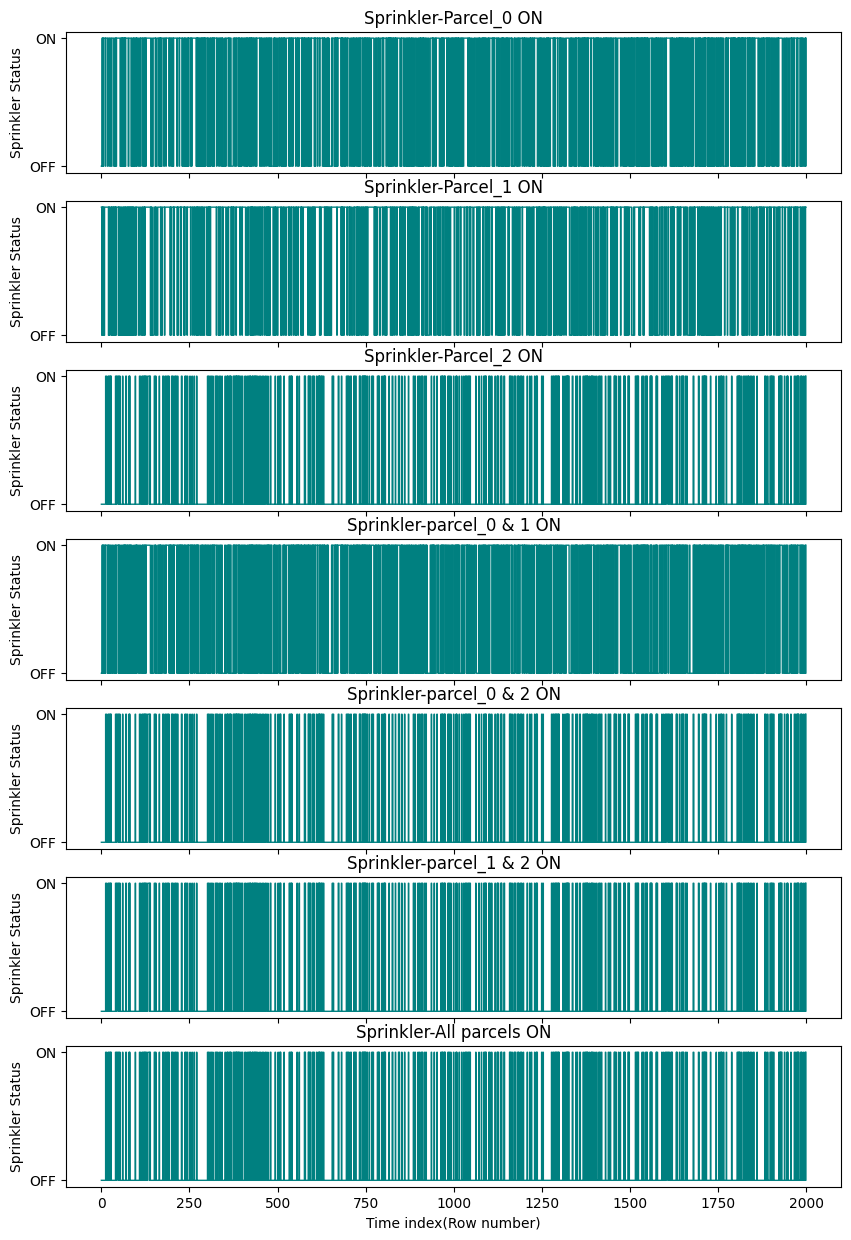

In [26]:
import matplotlib.pyplot as plt
conditions={
    "Parcel_0 ON":df['parcel_0'],
    "Parcel_1 ON":df['parcel_1'],
    "Parcel_2 ON":df['parcel_2'],
    "parcel_0 & 1 ON":df['parcel_0']&df['parcel_1'],
    "parcel_0 & 2 ON":df['parcel_0']&df['parcel_2'],
    "parcel_1 & 2 ON":df['parcel_1']&df['parcel_2'],
    "All parcels ON" :df['parcel_0']&df['parcel_1']&df['parcel_2']
}
fig,axs=plt.subplots(nrows=len(conditions),figsize=(10,15),sharex=True)
for ax,(title,conditions) in zip(axs,conditions.items()):
  ax.step(df.index,conditions.astype(int),where='post',linewidth=1,color='teal')
  ax.set_title(f"Sprinkler-{title}")
  ax.set_ylabel("Sprinkler Status")
  ax.set_yticks([0,1])
  ax.set_yticklabels(['OFF','ON'])

axs[-1].set_xlabel("Time index(Row number)")
plt.show()

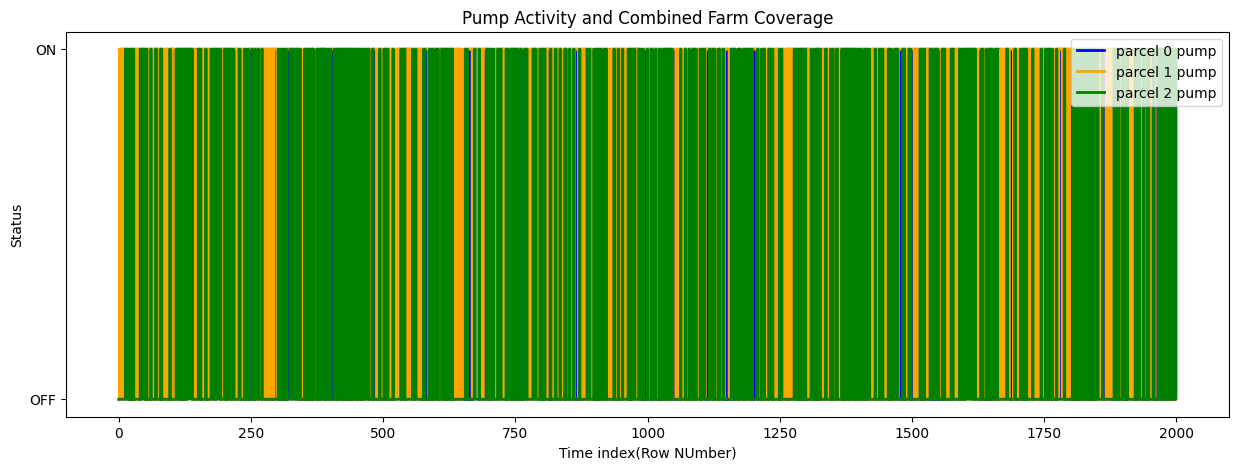

In [32]:
any_pump_on=((df['parcel_0']==1)|(df['parcel_1']==1)|(df['parcel_2']==1))
plt.figure(figsize=(15,5))
plt.step(df.index,df['parcel_0'],where='post',linewidth=2,color='blue',label='parcel 0 pump')
plt.step(df.index,df['parcel_1'],where='post',linewidth=2,color='orange',label='parcel 1 pump')
plt.step(df.index,df['parcel_2'],where='post',linewidth=2,color='green',label='parcel 2 pump')
plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time index(Row NUmber)")
plt.ylabel("Status")
plt.yticks([0,1],['OFF','ON']) # Corrected yticks to use numerical values
plt.legend(loc="upper right")
plt.show()

In [37]:
import joblib
from sklearn.pipeline import Pipeline
joblib.dump(model,"Farm_irrigation_System.pkl")

['Farm_irrigation_System.pkl']